In [6]:
%matplotlib inline 

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, Embedding
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.preprocessing import sequence

import csv

import matplotlib.pyplot as plt

In [13]:
input_length = 300
nb_epoch = 15
input_dim = 256

In [14]:
rin_chan = {'hoshizora':0, 'shibuya':1, 'toosaka':2, 'matsuoka':3}
x = []
y = []
for line in csv.reader(open('../data/data.tsv'), delimiter='\t'):
    x.append(list(line[1]))
    y.append(rin_chan[line[0]])
y = np_utils.to_categorical(y)

word_dict = {}
for i, xi in enumerate(x):
    for j, xj in enumerate(xi):
        word_dict[xj]= word_dict.get(xj, len(word_dict))
        x[i][j] = word_dict[xj]

x = sequence.pad_sequences(x, input_length)

x_train = x[0:6000]
y_train = y[0:6000]

x_test = x[6000:]
y_test = y[6000:]

In [15]:
model = Sequential()
model.add(Embedding(len(word_dict), input_dim,  input_length=input_length, dropout=0.2))
model.add(LSTM(input_dim, return_sequences=True, dropout_W=0.2, dropout_U=0.2, consume_less='cpu'))
model.add(LSTM(input_dim, dropout_W=0.2, dropout_U=0.2, consume_less='cpu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, batch_size=200, nb_epoch=nb_epoch, validation_split=0.1, verbose=1)

Train on 5400 samples, validate on 600 samples
Epoch 1/15
5400/5400 [==============================] - 750s - loss: 1.4102 - acc: 0.2674 - val_loss: 1.4084 - val_acc: 0.2417
Epoch 2/15
5400/5400 [==============================] - 737s - loss: 1.3970 - acc: 0.2835 - val_loss: 1.3536 - val_acc: 0.3533
Epoch 3/15
5400/5400 [==============================] - 676s - loss: 1.3176 - acc: 0.3596 - val_loss: 1.2267 - val_acc: 0.4250
Epoch 4/15
5400/5400 [==============================] - 677s - loss: 1.2348 - acc: 0.4231 - val_loss: 1.1733 - val_acc: 0.4483
Epoch 5/15
5400/5400 [==============================] - 673s - loss: 1.1253 - acc: 0.4822 - val_loss: 1.1469 - val_acc: 0.5067
Epoch 6/15
5400/5400 [==============================] - 675s - loss: 1.0558 - acc: 0.5328 - val_loss: 1.0466 - val_acc: 0.5533
Epoch 7/15
5400/5400 [==============================] - 725s - loss: 1.0028 - acc: 0.5672 - val_loss: 1.0370 - val_acc: 0.5417
Epoch 8/15
5400/5400 [==============================] - 697s - l

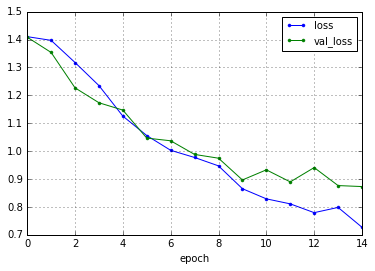

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.show()

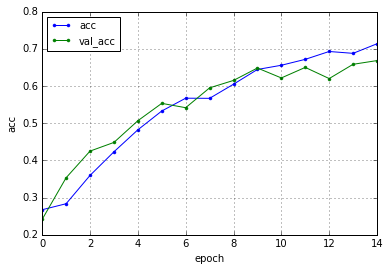

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(nb_epoch), acc, marker='.', label='acc')
plt.plot(range(nb_epoch), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [19]:
model.evaluate(x_test, y_test)

1581/1581 [==============================] - 32s    


[0.8972507179499728, 0.65148640123822132]